In [2]:
import pandas as pd
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
spark=SparkSession.builder.appName('Practice').getOrCreate()

In [9]:
#Reding file to sprak data fram
dfs = spark.read.csv(r"C:\Users\admin\Desktop\Projects\TA Project\Data\cookie_cats.csv", header=True, inferSchema=True)

In [3]:
# Reading data frame into pandas data frame
dfp = pd.read_csv(r"C:\Users\admin\Desktop\Projects\TA Project\Data\cookie_cats.csv")
# df_p = dfs.toPandas()

In [13]:
dfs.show(5)

+------+-------+--------------+-----------+-----------+
|userid|version|sum_gamerounds|retention_1|retention_7|
+------+-------+--------------+-----------+-----------+
|   116|gate_30|             3|      false|      false|
|   337|gate_30|            38|       true|      false|
|   377|gate_40|           165|       true|      false|
|   483|gate_40|             1|      false|      false|
|   488|gate_40|           179|       true|       true|
+------+-------+--------------+-----------+-----------+
only showing top 5 rows



In [26]:
dfs.dtypes

[('userid', 'int'),
 ('version', 'string'),
 ('sum_gamerounds', 'int'),
 ('retention_1', 'boolean'),
 ('retention_7', 'boolean')]

In [28]:
dfs.describe().show()

+-------+-----------------+-------+------------------+
|summary|           userid|version|    sum_gamerounds|
+-------+-----------------+-------+------------------+
|  count|            90189|  90189|             90189|
|   mean|4998412.234496446|   null|  51.8724567297564|
| stddev|2883285.607700425|   null|195.05085754200826|
|    min|              116|gate_30|                 0|
|    max|          9999861|gate_40|             49854|
+-------+-----------------+-------+------------------+



In [6]:
#No Nulls in any column
dfp.isna().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [33]:
#only 2 different versions of game in this dataset
dfs.select("version").distinct().show()

+-------+
|version|
+-------+
|gate_30|
|gate_40|
+-------+



In [11]:
#creating temp View from Dataframe so that we can run SQL queries on it
dfs.createOrReplaceTempView("GAME_DATA")

In [12]:
spark.sql("SELECT version, count(userid) as cnt_user_id FROM GAME_DATA group by version").show()

+-------+-----------+
|version|cnt_user_id|
+-------+-----------+
|gate_30|      44700|
|gate_40|      45489|
+-------+-----------+



#### Assignment Questions
1. Which tools would you need to build a sustainable data infrastructure and why?

2. What is the overall retention rate for the game? How does this rate differ by game
version?

3. What is the distribution of game rounds played? How does this distribution differ by
game version?

4. What is the average number of game rounds played before a player makes an in-app
purchase? How does this average differ by game version?

5. What is the correlation between the number of game rounds played and retention? Does
this correlation differ by game version?

6. What are the most popular game events, and how do these events impact player
retention and monetization?

7. How do advertising campaigns impact player acquisition, retention, and monetization?

8. Can you identify any trends or patterns in player behaviour, such as differences in
behaviour by player country, platform, or game version?

9. What recommendations would you make to improve player engagement and
monetization, based on your analysis?

10. Please describe the data funnel for performance ad campaigns until the install/activation
event

11. Please identify and explain the different metrics between web2 and web3 gaming for
monetisation and player engagement

12. What are the main challenges for web3 gaming data engineers and Why?

In [86]:
# 2.What is the overall retention rate for the game? How does this rate differ by game version?
# Retention Rate formula used = count(retention_1 = true or retention_1 = true)/total_count_userid * 100
retention_count = spark.sql("SELECT count(*) FROM GAME_DATA where (retention_1 or retention_7)").collect()[0][0]
total_userid_count = spark.sql("SELECT count(distinct userid) FROM GAME_DATA ").collect()[0][0]
print(f"retention_count:{retention_count}, total_userid_count:{total_userid_count}")
print(f"Overall Retention Rate:{retention_count/total_userid_count*100}%")

retention_count:43752, total_userid_count:90189
Overall Retention Rate:48.511459268868705%


In [87]:
gate_30_count = spark.sql("SELECT version,count(*) as retentained_users FROM GAME_DATA where (retention_1 or retention_7) group by version order by version").collect()[0][1]
gate_40_count = spark.sql("SELECT version,count(*) as retentained_users FROM GAME_DATA where (retention_1 or retention_7) group by version order by version").collect()[1][1]
gate_30_total = spark.sql("SELECT version,count(*) as retentained_users FROM GAME_DATA group by version order by version").collect()[0][1]
gate_40_total = spark.sql("SELECT version,count(*) as retentained_users FROM GAME_DATA group by version order by version").collect()[1][1]

In [92]:
print("\n\nRetention rate is not differing by game version !\n\n")
print("="*80)
print(f"gate_30_retained_users_count:{gate_30_count}, gate_30_total_userid_count:{gate_30_total}")
print(f"Gate_30 Retention Rate:{gate_30_count/gate_30_total*100}%")
print("="*80)
print(f"gate_40_retained_users_count:{gate_40_count}, gate_40_total_userid_count:{gate_40_total}")
print(f"Gate_40 Retention Rate:{gate_40_count/gate_40_total*100}%")
print("="*80)



Retention rate is not differing by game version !


gate_30_retained_users_count:21860, gate_30_total_userid_count:44700
Gate_30 Retention Rate:48.903803131991054%
gate_40_retained_users_count:21892, gate_40_total_userid_count:45489
Gate_40 Retention Rate:48.125920552221416%


In [64]:
retention_count = spark.sql("SELECT count(*) FROM GAME_DATA where (retention_1 or retention_7)").collect()[0][0]
total_userid_count = spark.sql("SELECT count(distinct userid) FROM GAME_DATA ").collect()[0][0]

In [63]:
print(f"retention_count:{retention_count}, total_userid_count:{total_userid_count}")
print(f"Overall Retention Rate:{retention_count/total_userid_count*100}%")

retention_count:43752, total_userid_count:90189
Overall Retention Rate:48.511459268868705%


In [115]:
 spark.sql("SELECT min(sum_gamerounds),max(sum_gamerounds) FROM GAME_DATA").show()

+-------------------+-------------------+
|min(sum_gamerounds)|max(sum_gamerounds)|
+-------------------+-------------------+
|                  0|              49854|
+-------------------+-------------------+



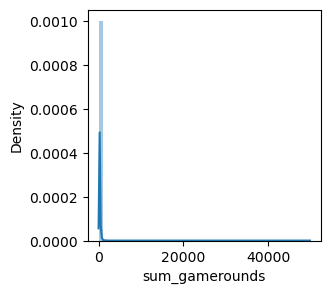

In [33]:
fig, ax = plt.subplots(figsize=(3, 3))
sns.distplot(dfp["sum_gamerounds"], ax=ax)
plt.show()

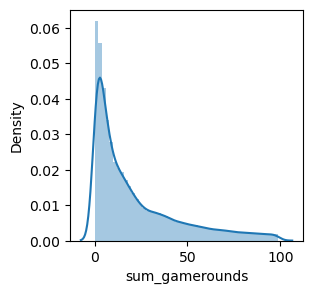

In [38]:
fig, ax = plt.subplots(figsize=(3, 3))
sns.distplot(dfp["sum_gamerounds"].loc[dfp["sum_gamerounds"] < 100],ax=ax)
plt.show()

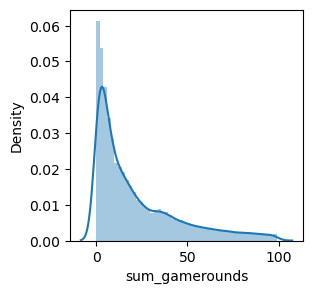

In [56]:
fig, ax = plt.subplots(figsize=(3, 3))
sns.distplot(dfp["sum_gamerounds"].loc[(dfp["sum_gamerounds"] < 100) & (dfp["version"] == "gate_30") ],ax=ax, label="gate_30")
plt.show()

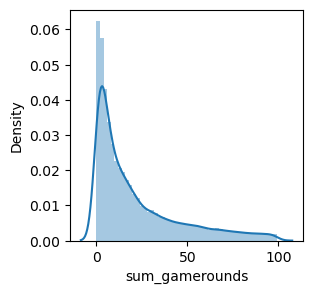

In [50]:
fig, ax = plt.subplots(figsize=(3, 3))
sns.distplot(dfp["sum_gamerounds"].loc[(dfp["sum_gamerounds"] < 100) & (dfp["version"] == "gate_40") ],ax=ax)
plt.show()

In [51]:
# 3 distrubution is skewed to left that means frequency of sum_games is more for less value of sum_games

In [85]:
#5 Correlation
# Over all correlation
dfp[["sum_gamerounds","retention_1","retention_7"]].corr().head(1)

,sum_gamerounds,retention_1,retention_7
sum_gamerounds,1.0,0.197603,0.279288


In [84]:
#gate_30 version correlation
dfp[["sum_gamerounds","retention_1","retention_7"]].loc[dfp["version"] == "gate_30"].corr().head(1)

,sum_gamerounds,retention_1,retention_7
sum_gamerounds,1.0,0.14729,0.214284


In [83]:
#gate_40 version correlation
dfp[["sum_gamerounds","retention_1","retention_7"]].loc[dfp["version"] == "gate_40"].corr().head(1)

,sum_gamerounds,retention_1,retention_7
sum_gamerounds,1.0,0.380046,0.522188


In [86]:
# sum_gamerounds correlation rate over all is 0.197603,0.279288 with retention_1 and retention_2

In [88]:
spark.sql("select version,retention_1,retention_7,count(*) from game_data group by version,retention_1,retention_7 order by version,retention_1,retention_7").show()

+-------+-----------+-----------+--------+
|version|retention_1|retention_7|count(1)|
+-------+-----------+-----------+--------+
|gate_30|      false|      false|   22840|
|gate_30|      false|       true|    1826|
|gate_30|       true|      false|   13358|
|gate_30|       true|       true|    6676|
|gate_40|      false|      false|   23597|
|gate_40|      false|       true|    1773|
|gate_40|       true|      false|   13613|
|gate_40|       true|       true|    6506|
+-------+-----------+-----------+--------+



In [89]:
# I do not observe any different Trend for different versions

In [91]:
spark.sql("select version,sum_gamerounds from game_data")

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [13]:
spark.sql("select version,sum(sum_gamerounds) as sum_gamerounds,max(sum_gamerounds) max_sum_gamerounds from game_data group by version").show()

+-------+--------------+------------------+
|version|sum_gamerounds|max_sum_gamerounds|
+-------+--------------+------------------+
|gate_30|       2344795|             49854|
|gate_40|       2333530|              2640|
+-------+--------------+------------------+

